In [95]:
#READ DATASET
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

fire_data = pd.read_csv("Acoustic_Extinguisher_Fire_Dataset.csv")


In [96]:
# SIZE OF DATA
fire_data.shape

(17442, 7)

In [97]:
fire_data.duplicated().any()

False

In [98]:
fire_data.head()

,SIZE,FUEL,DISTANCE,DESIBEL,AIRFLOW,FREQUENCY,STATUS
0,1,gasoline,10,96,0.0,75,0
1,1,gasoline,10,96,0.0,72,1
2,1,gasoline,10,96,2.6,70,1
3,1,gasoline,10,96,3.2,68,1
4,1,gasoline,10,109,4.5,67,1


In [99]:
fire_data.describe()

,SIZE,DISTANCE,DESIBEL,AIRFLOW,FREQUENCY,STATUS
count,17442.000000,17442.000000,17442.000000,17442.000000,17442.000000,17442.000000
mean,3.411765,100.000000,96.379142,6.975634,31.611111,0.497821
std,1.750977,54.773826,8.164096,4.736169,20.939149,0.500010
min,1.000000,10.000000,72.000000,0.000000,1.000000,0.000000
25%,2.000000,50.000000,90.000000,3.200000,14.000000,0.000000
50%,3.000000,100.000000,95.000000,5.800000,27.500000,0.000000
75%,5.000000,150.000000,104.000000,11.200000,47.000000,1.000000
max,7.000000,190.000000,113.000000,17.000000,75.000000,1.000000


In [100]:
kerosene = []
gasoline = []
lpg = []
thinner = []

dic = {1: 7, 2: 12, 3: 14, 4:16, 5:20, 6:1, 7:2}

for index, row in fire_data.iterrows():
    if(row['FUEL']) == 'kerosene':
      kerosene.append(dic.get(row['SIZE']))
      gasoline.append(0)
      lpg.append(0)
      thinner.append(0)
    if(row['FUEL']) == 'gasoline':
      kerosene.append(0)
      gasoline.append(dic.get(row['SIZE']))
      lpg.append(0)
      thinner.append(0)
    if(row['FUEL']) == 'thinner':
      kerosene.append(0)
      gasoline.append(0)
      lpg.append(0)
      thinner.append(dic.get(row['SIZE']))
    if(row['FUEL']) == 'lpg':
      kerosene.append(0)
      gasoline.append(0)
      lpg.append(dic.get(row['SIZE']))
      thinner.append(0)

In [101]:
fire_data['KEROSENE'] = kerosene
fire_data['GASOLINE'] = gasoline
fire_data['THINNER'] = thinner
fire_data['LPG'] = lpg
fire_data = fire_data.drop(['FUEL'], axis=1)
fire_data = fire_data.drop(['SIZE'], axis=1)

In [102]:
# TYPES
fire_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17442 entries, 0 to 17441
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   DISTANCE   17442 non-null  int64  
 1   DESIBEL    17442 non-null  int64  
 2   AIRFLOW    17442 non-null  float64
 3   FREQUENCY  17442 non-null  int64  
 4   STATUS     17442 non-null  int64  
 5   KEROSENE   17442 non-null  int64  
 6   GASOLINE   17442 non-null  int64  
 7   THINNER    17442 non-null  int64  
 8   LPG        17442 non-null  int64  
dtypes: float64(1), int64(8)
memory usage: 1.2 MB


In [103]:
# FIRST ROWS EXAMPLE
fire_data.head()

,DISTANCE,DESIBEL,AIRFLOW,FREQUENCY,STATUS,KEROSENE,GASOLINE,THINNER,LPG
0,10,96,0.0,75,0,0,7,0,0
1,10,96,0.0,72,1,0,7,0,0
2,10,96,2.6,70,1,0,7,0,0
3,10,96,3.2,68,1,0,7,0,0
4,10,109,4.5,67,1,0,7,0,0


In [104]:
# ANALYSE DATA
fire_data.describe()

,DISTANCE,DESIBEL,AIRFLOW,FREQUENCY,STATUS,KEROSENE,GASOLINE,THINNER,LPG
count,17442.000000,17442.000000,17442.000000,17442.000000,17442.000000,17442.000000,17442.000000,17442.000000,17442.000000
mean,100.000000,96.379142,6.975634,31.611111,0.497821,4.058824,4.058824,4.058824,0.176471
std,54.773826,8.164096,4.736169,20.939149,0.500010,6.708138,6.708138,6.708138,0.512826
min,10.000000,72.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50.000000,90.000000,3.200000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,100.000000,95.000000,5.800000,27.500000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,150.000000,104.000000,11.200000,47.000000,1.000000,7.000000,7.000000,7.000000,0.000000
max,190.000000,113.000000,17.000000,75.000000,1.000000,20.000000,20.000000,20.000000,2.000000


0    8759
1    8683
Name: STATUS, dtype: int64

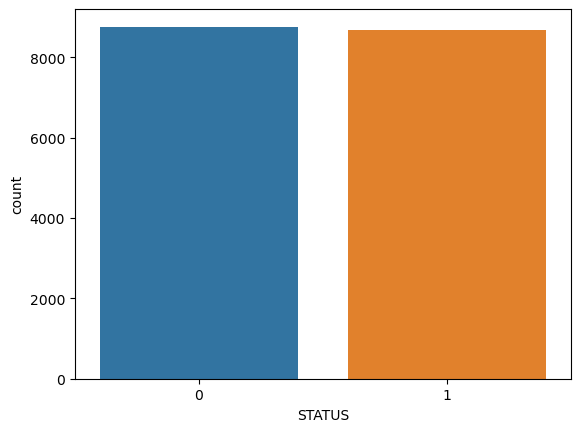

In [105]:
# FIRES EXTINGUISHED
sb.countplot(data=fire_data, x="STATUS")
fire_data['STATUS'].value_counts()

In [106]:
fire_data['GASOLINE'].value_counts() 

0     12312
7      1026
12     1026
14     1026
16     1026
20     1026
Name: GASOLINE, dtype: int64

In [107]:
fire_data['KEROSENE'].value_counts() 

0     12312
7      1026
12     1026
14     1026
16     1026
20     1026
Name: KEROSENE, dtype: int64

In [108]:
fire_data['THINNER'].value_counts() 

0     12312
7      1026
12     1026
14     1026
16     1026
20     1026
Name: THINNER, dtype: int64

10     918
110    918
180    918
170    918
160    918
150    918
140    918
130    918
120    918
100    918
20     918
90     918
80     918
70     918
60     918
50     918
40     918
30     918
190    918
Name: DISTANCE, dtype: int64

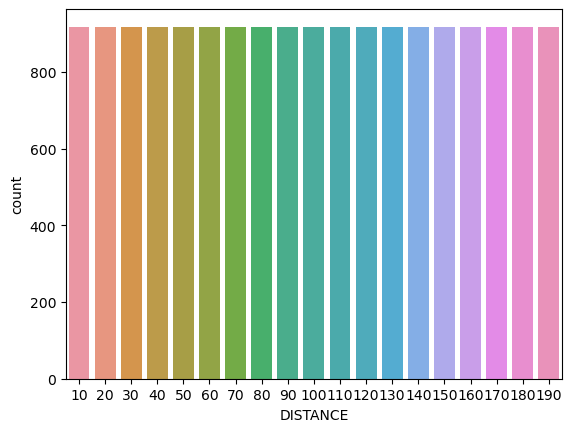

In [109]:
# FUEL USED
sb.countplot(data=fire_data, x="DISTANCE")
fire_data['DISTANCE'].value_counts()

<AxesSubplot:xlabel='DESIBEL', ylabel='Count'>

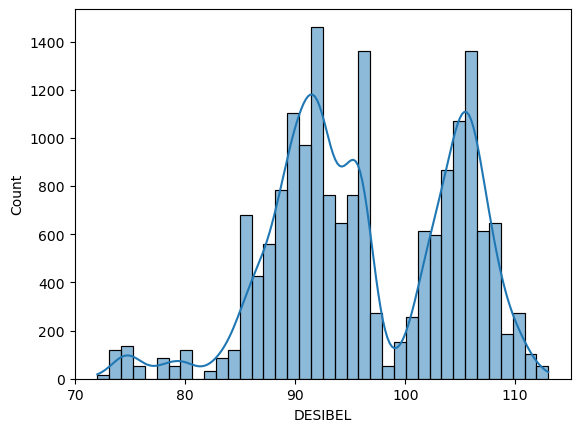

In [110]:
showKDE = True # change to see line and bard
sb.histplot(data=fire_data, x="DESIBEL", kde=showKDE)

<AxesSubplot:xlabel='FREQUENCY', ylabel='Count'>

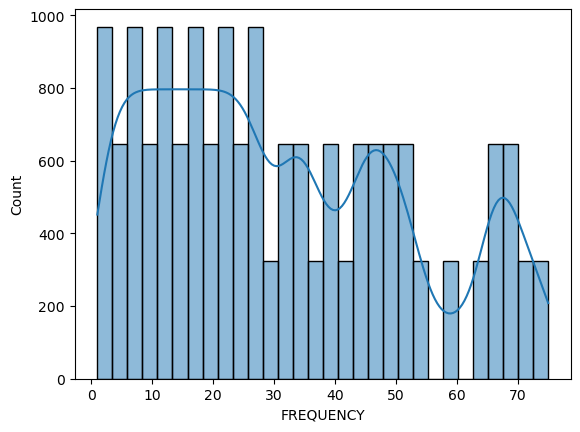

In [111]:
showKDE = True # change to see line and bard
sb.histplot(data=fire_data, x="FREQUENCY", kde=showKDE)

<AxesSubplot:xlabel='AIRFLOW', ylabel='Count'>

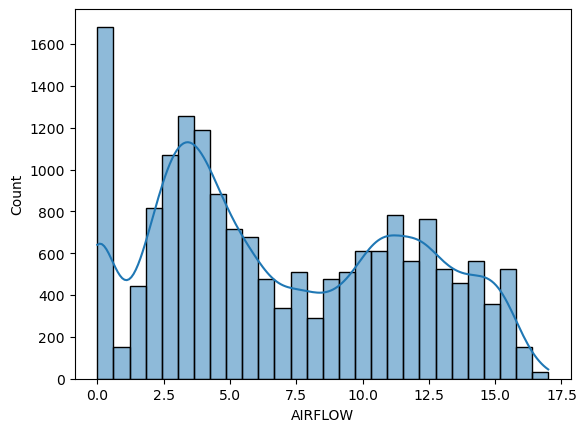

In [112]:
# NUMBER OF TESTS WITH SPECIFIC AIRFLOWS
showKDE = True # change to see line and bard
sb.histplot(data=fire_data, x="AIRFLOW", kde=showKDE)

<AxesSubplot:xlabel='STATUS', ylabel='AIRFLOW'>

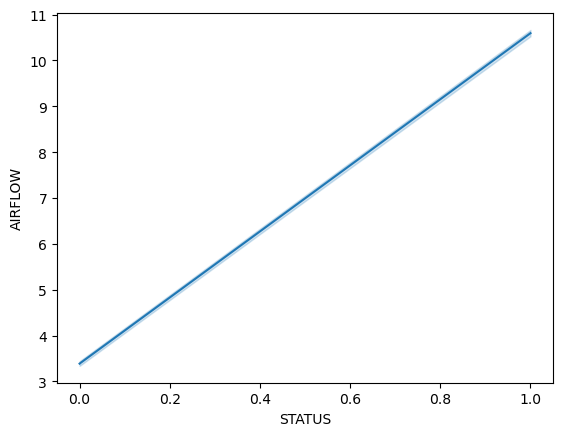

In [113]:
sb.lineplot(data=fire_data, x="STATUS", y="AIRFLOW")
#declive é o mesmo isolando cada tipo de combustivel


<AxesSubplot:xlabel='STATUS', ylabel='FREQUENCY'>

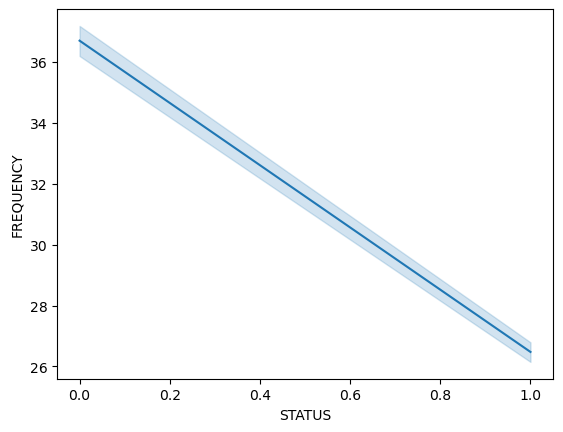

In [114]:
sb.lineplot(data=fire_data, x="STATUS", y="FREQUENCY")

<AxesSubplot:xlabel='STATUS', ylabel='DESIBEL'>

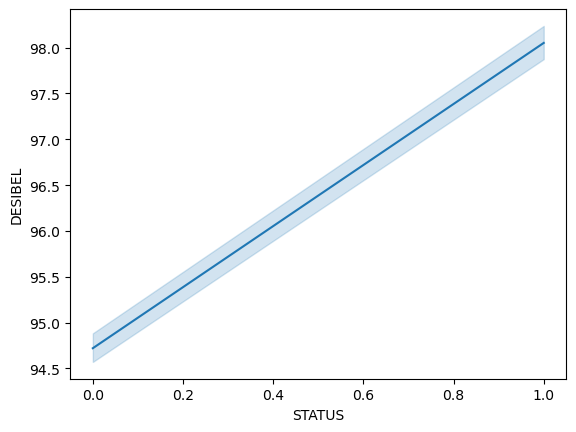

In [115]:
sb.lineplot(data=fire_data, x="STATUS", y="DESIBEL")

<AxesSubplot:xlabel='STATUS', ylabel='AIRFLOW'>

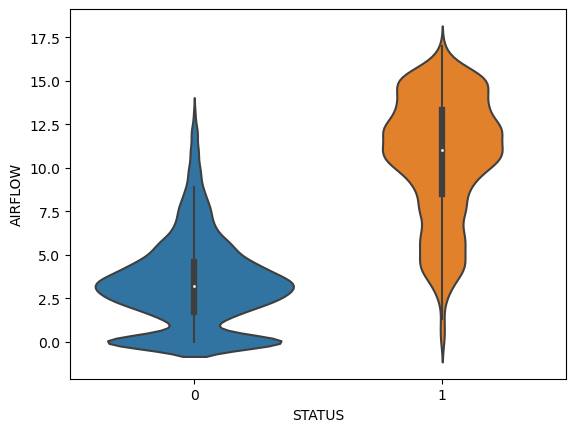

In [116]:
sb.violinplot(data=fire_data, x="STATUS", y="AIRFLOW")

<AxesSubplot:xlabel='STATUS', ylabel='DESIBEL'>

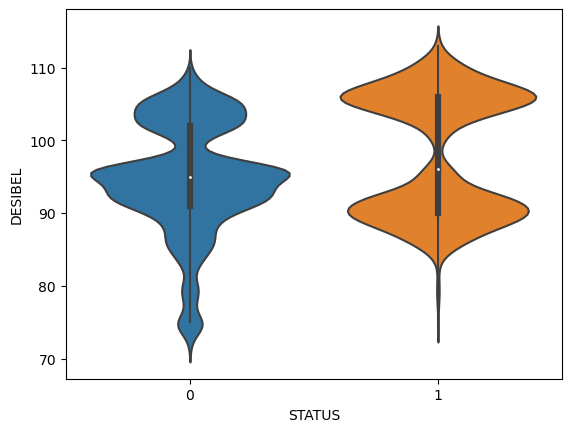

In [117]:
sb.violinplot(data=fire_data, x="STATUS", y="DESIBEL")

<AxesSubplot:xlabel='STATUS', ylabel='FREQUENCY'>

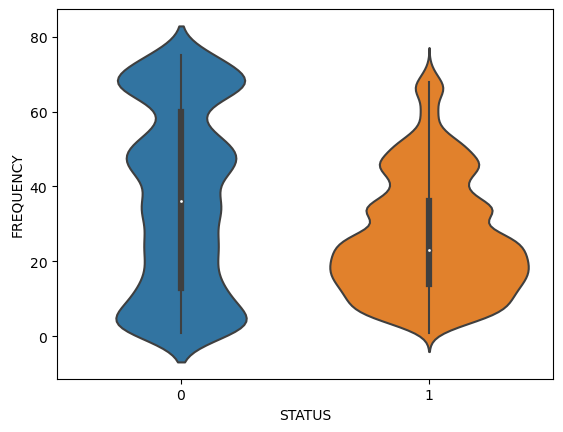

In [118]:
sb.violinplot(x=fire_data["STATUS"], y=fire_data["FREQUENCY"])

<AxesSubplot:xlabel='STATUS', ylabel='DISTANCE'>

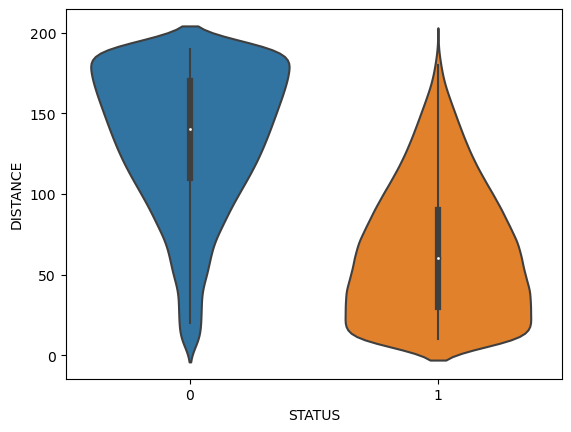

In [119]:
sb.violinplot(x=fire_data["STATUS"], y=fire_data["DISTANCE"])

<AxesSubplot:xlabel='GASOLINE', ylabel='count'>

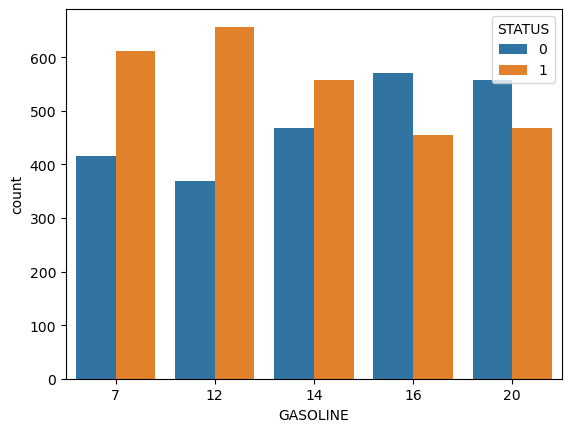

In [120]:
sb.countplot(data=fire_data[fire_data['GASOLINE'] > 0], x="GASOLINE", hue="STATUS")

<AxesSubplot:xlabel='KEROSENE', ylabel='count'>

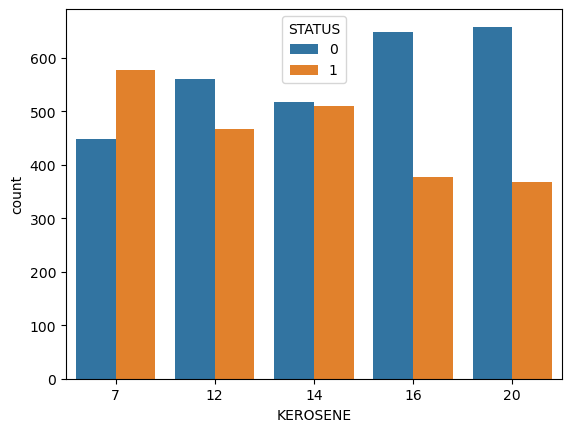

In [121]:
sb.countplot(data=fire_data[fire_data['KEROSENE'] > 0], x="KEROSENE", hue="STATUS")

<AxesSubplot:xlabel='THINNER', ylabel='count'>

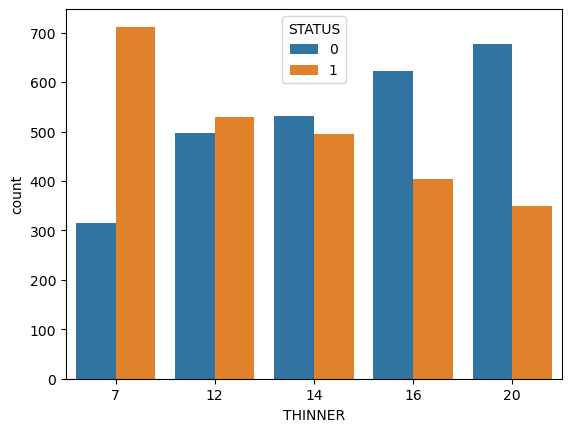

In [122]:
sb.countplot(data=fire_data[fire_data['THINNER'] > 0], x="THINNER", hue="STATUS")

<AxesSubplot:xlabel='LPG', ylabel='count'>

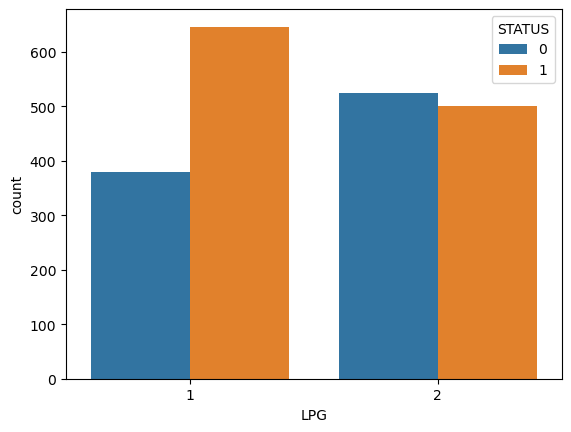

In [123]:
sb.countplot(data=fire_data[fire_data['LPG'] > 0], x="LPG", hue="STATUS")

<AxesSubplot:xlabel='DISTANCE', ylabel='FREQUENCY'>

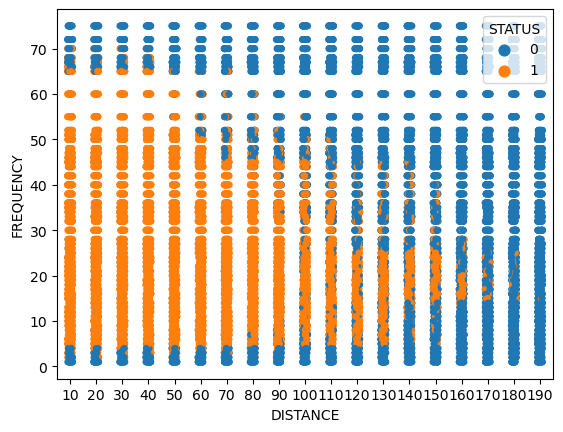

In [124]:
sb.stripplot(data=fire_data, x="DISTANCE", y="FREQUENCY", hue="STATUS")

<AxesSubplot:xlabel='GASOLINE', ylabel='DISTANCE'>

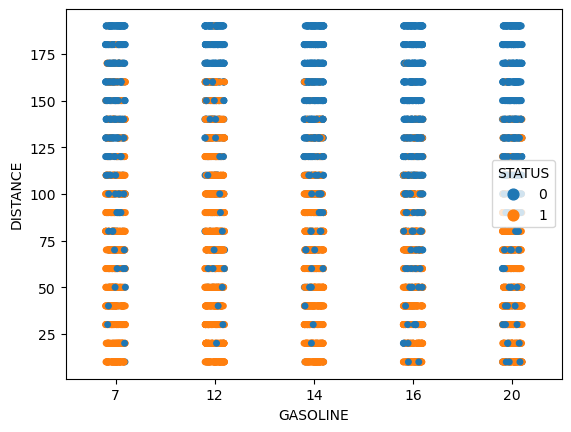

In [125]:
sb.stripplot(data=fire_data[fire_data['GASOLINE'] > 0], x="GASOLINE", y="DISTANCE", hue="STATUS")

<AxesSubplot:xlabel='KEROSENE', ylabel='DISTANCE'>

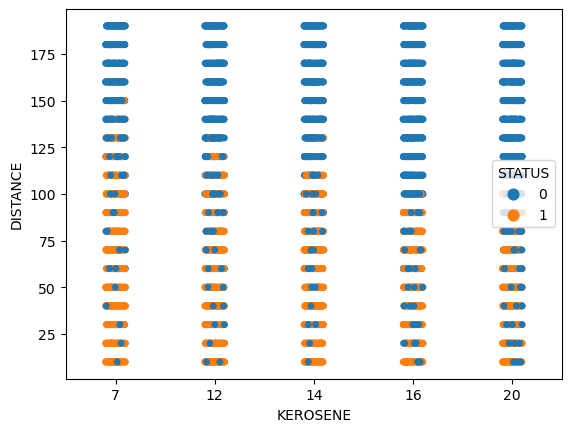

In [126]:
sb.stripplot(data=fire_data[fire_data['KEROSENE'] > 0], x="KEROSENE", y="DISTANCE", hue="STATUS")

<AxesSubplot:xlabel='THINNER', ylabel='DISTANCE'>

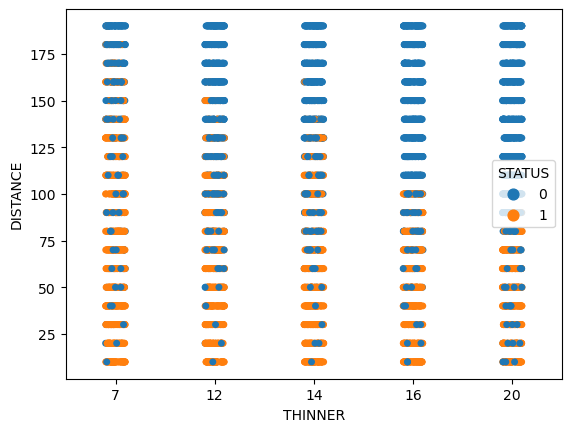

In [127]:
sb.stripplot(data=fire_data[fire_data['THINNER'] > 0], x="THINNER", y="DISTANCE", hue="STATUS")

<AxesSubplot:xlabel='LPG', ylabel='DISTANCE'>

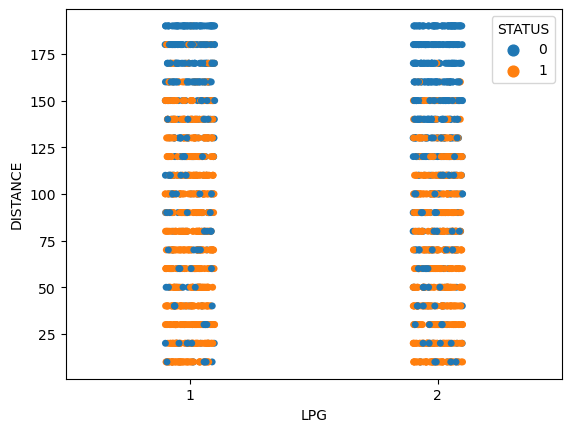

In [128]:
sb.stripplot(data=fire_data[fire_data['LPG'] > 0], x="LPG", y="DISTANCE", hue="STATUS")

In [129]:
#sb.pairplot(fire_data,hue='STATUS')

<AxesSubplot:>

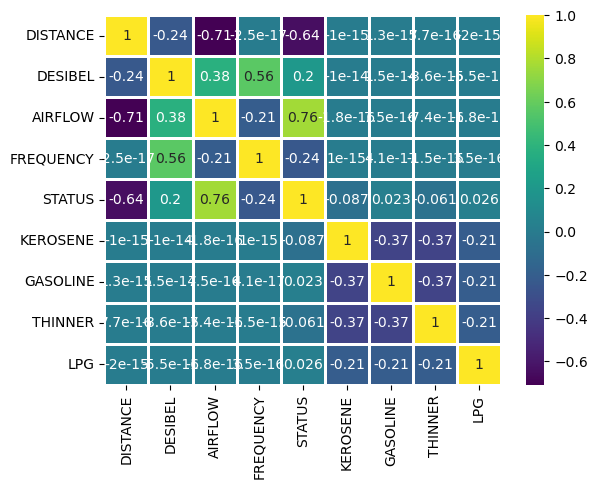

In [130]:
sb.heatmap(fire_data.corr(),annot=True,cmap='viridis',linewidths=2)


In [131]:
np.abs(fire_data.corr()['STATUS']).sort_values().tail(4)

FREQUENCY    0.244203
DISTANCE     0.644051
AIRFLOW      0.760628
STATUS       1.000000
Name: STATUS, dtype: float64

In [132]:
#Data Modelling 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

X=fire_data.drop(['STATUS'],axis=1)
y=fire_data['STATUS']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=5)

In [133]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
classifier1 = DecisionTreeClassifier()
classifier1.fit(X_train,y_train)
y_pred = classifier1.predict(X_test)

In [134]:
confusion_matrix(y_test,y_pred)

array([[2542,   84],
       [  91, 2516]], dtype=int64)

In [135]:
decision_trees_accuracy = accuracy_score(y_test,y_pred)
print(decision_trees_accuracy)

0.9665583795146188


In [136]:
#SVC
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
st_x= StandardScaler()    
X_train= st_x.fit_transform(X_train)    
X_test= st_x.transform(X_test) 
classifier = SVC(kernel='linear', random_state=0)  
classifier.fit(X_train, y_train)  
y_pred= classifier.predict(X_test)  


In [137]:
confusion_matrix(y_test,y_pred)

array([[2396,  230],
       [ 287, 2320]], dtype=int64)

In [138]:
svc_accuracy = accuracy_score(y_test,y_pred)
print(svc_accuracy)

0.9012038983374737


In [139]:
#K-NN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)

print(confusion_matrix(y_test,y_pred))

k_nn_accuracy = accuracy_score(y_test,y_pred)
print(k_nn_accuracy)

[[2525  101]
 [ 105 2502]]
0.9606344353143512


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [140]:
#NAIVE BAYES
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train,y_train)
y_pred = gnb.predict(X_test)

print(confusion_matrix(y_test,y_pred))

naive_bayes_accuracy = accuracy_score(y_test,y_pred)
print(naive_bayes_accuracy)

[[2408  218]
 [ 410 2197]]
0.8799923562010319


In [141]:
#Random Forest
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
classifier2 = RandomForestClassifier()
classifier2.fit(X_train,y_train)

y_pred.shape

print(confusion_matrix(y_test,y_pred))

random_forest_accuracy = accuracy_score(y_test,y_pred)
print(random_forest_accuracy)

[[2408  218]
 [ 410 2197]]
0.8799923562010319


([0, 1, 2, 3, 4],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

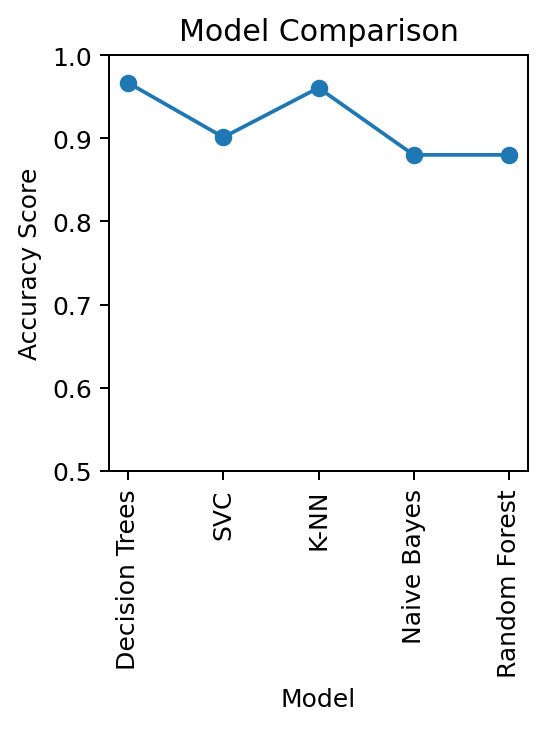

In [142]:
models = ['Decision Trees','SVC','K-NN','Naive Bayes','Random Forest']
score = [decision_trees_accuracy,svc_accuracy,k_nn_accuracy,naive_bayes_accuracy,random_forest_accuracy]

plt.figure(figsize=(3,3),dpi=180)
plt.plot(models,score,marker='o')
plt.ylim(0.5,1)
plt.xlabel('Model')
plt.ylabel('Accuracy Score')
plt.title('Model Comparison')
plt.xticks(rotation=90)